# Endomorhismes symétriques et automorphismes orthogonaux

## Exercice

Soit $E$ un espace euclidien, $u\in E\setminus\{0_{_E}\}$.
1. Donner l'équation de l'hyperplan $H$ orthogonal à $u$.
1. Exprimer la projection orthogonale $p_{_H}$ sur $H$. Puis la symétrie orthogonale $s_{_H}$ par rapport à $H$.
1. On prend $E=\mathbb{R}^n$, pour $n\in\mathbb{N}^*$, donner les matrices dans la base canonique (supposée orthonormée) de $\mathbb{R}^n$ de $p_{_H}$ et $s_{_H}$.
1. Proposer une fonction `Python` prenant le vecteur $u$ et produisant la matrice de $s_{_H}$.

**Question 1**

C'est $\langle u,x\rangle=0$.

**Question 2**

Le cours du semestre 1, nous permet d'écrire que
$$\forall x\in E,\; p_{_H}(x)=x-\frac{\langle u,x\rangle}{\|u\|^2}.u$$
La symétrie orthogonale s'obtient à partir de la projection.
$$\forall x\in E,\; s_{_H}(x)=2.p_{_H}(x)-x=x-2\,\frac{\langle u,x\rangle}{\|u\|^2}.u$$

**Question 3**

Notons $(c_1,\ldots,c_n)$ la base canonique (orthonormée). La matrice de $s_{_H}$ dans cette base s'écrit alors
$$\mathrm{Mat}\left(s_{_H},(c_1,\ldots,c_n)\right)=\left[\langle c_i,s_{_H}(c_j)\right]_{(i,j)\in\{1,\ldots,n\}^2}$$

**Question 4**

On applique simplement la formule.

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
def mat(u):
    n = len(u)
    M = sp.zeros(n, n)
    for j in range(n):
        cj = sp.Matrix([int(i == j) for i in range(n)])
        Mcj = cj-2*cj.dot(u)/u.norm()**2*u
        for i in range(n):
            M[i, j] = Mcj[i]
    return M

## Exercice

On considère la matrice 
$$M=\begin{bmatrix} 0&0&{{16
 }\over{25}}&-{{3}\over{5}}&-{{12}\over{25}}\cr 0&{{3}\over{5}}&-{{12
 }\over{25}}&0&-{{16}\over{25}}\cr -{{16}\over{25}}&{{12}\over{25}}&
 {{279}\over{625}}&{{48}\over{125}}&{{72}\over{625}}\cr {{3}\over{5}}
 &0&{{48}\over{125}}&{{16}\over{25}}&-{{36}\over{125}}\cr {{12}\over{
 25}}&{{16}\over{25}}&{{72}\over{625}}&-{{36}\over{125}}&{{321}\over{
 625}}\end{bmatrix}$$
1. Montrer qu'elle est dans $O_5(\mathbb{R})$.
1. À l'aide de `Python`, la décomposer en un produit de réflexions. *On pourra regarder $C_1=\,^t\begin{bmatrix}1& 0& \cdots& 0\end{bmatrix}$ et multiplier par une matrice de réflexion qui envoie $M\cdot C_1$ sur $C_1$ et ainsi de suite...*
1. À l'aide de `Python`, la mettre sous forme canonique.

In [1]:
import sympy as sp
sp.init_printing()

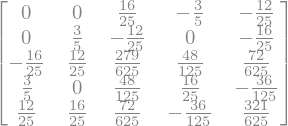

In [3]:
M = sp.Matrix([[0, 0, sp.S(16)/25, -sp.S(3)/5, -sp.S(12)/25], [0, sp.S(3)/5, -sp.S(12)/25, 0, -sp.S(16)/25],
               [-sp.S(16)/25, sp.S(12)/25, sp.S(279) /
                625, sp.S(48)/125, sp.S(72)/625],
               [sp.S(3)/5, 0, sp.S(48)/125, sp.S(16)/25, -sp.S(36)/125],
               [sp.S(12)/25, sp.S(16)/25, sp.S(72)/625, -sp.S(36)/125, sp.S(321)/625]])
M

**Question 1**

Le calcul suffit

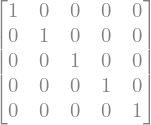

In [4]:
M@M.transpose()

**Question 2**

On va suivre l'algorithme donné en cours (en ne commençant pas par les premiers cas, mais en prenant les vecteurs un par un comme suggéré par l'énoncé).

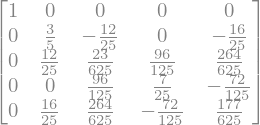

In [5]:
# Première étape
U = M[:, 0]-sp.Matrix([int(i == 0) for i in range(5)])
S1 = mat(U)
S1@M

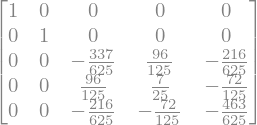

In [6]:
# Deuxième étape
U = _[:, 1]-sp.Matrix([int(i == 1) for i in range(5)])
S2 = mat(U)
S2@_

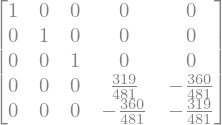

In [7]:
# Troisième étape
U = _[:, 2]-sp.Matrix([int(i == 2) for i in range(5)])
S3 = mat(U)
S3@_

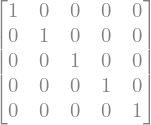

In [8]:
# Quatrième étape
U = _[:, 3]-sp.Matrix([int(i == 3) for i in range(5)])
S4 = mat(U)
S4@_

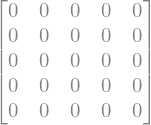

In [9]:
# Vérifions
S1@S2@S3@S4-M

**Question 3**

On va à nouveau suivre l'algorithme du cours. Comme on a trouvé 4 réflexions, on sait que $\{X\in\mathrm{M}_{5,1}(\mathbb{R},\; M\cdot X=X\}$ est de dimension 1.

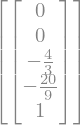

In [10]:
(M-sp.eye(5)).nullspace()

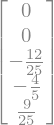

In [11]:
E1 = _[0]
E1 = E1/E1.norm()
E1

Ensuite, on cherche le plus gros cosinus. Il existe alors ($u$ est l'endomorphisme associé à $M$) un vecteur $e\ne0_{_{\mathbb{R}^n}}$ tel que
$$\frac12.\left(u(e)+u^\star(e)\right)=\cos(\theta).e$$
Le cosinus est donc solution de 
$$\det\left(\frac12.\left(u+u^\star\right)-c.\mathrm{id}_{_{\mathbb{R}^n}}\right)=0$$

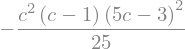

In [12]:
c = sp.symbols('c', real=True)
((M+M.transpose())/2-c*sp.eye(5)).det().factor()

1 correspond au vecteur $e_1$ que nous avons déjà trouvé, on prend donc $3/5$. Le vecteur $e_2$ qui nous intéresse vérifie
$$\frac12.\left(u+u^\star\right)(e)=\frac35.e$$

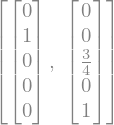

In [13]:
((M+M.transpose())/2-sp.S(3)/5*sp.eye(5)).nullspace()

In [14]:
# On orthonormalise
E2 = _[0]
E2 = E2/E2.norm()
E3 = _[1]
E3 = E3-E2.dot(E3)*E2
E3 = E3/E3.norm()

Le second cosinus est 0.

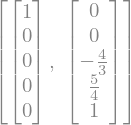

In [15]:
((M+M.transpose())/2).nullspace()

In [16]:
E4 = _[0]
E4 = E4/E4.norm()
E5 = _[1]
E5 = E5-E5.dot(E4)*E4
E5 = E5/E5.norm()

In [17]:
P = sp.Matrix([E1, E2, E3, E4, E5]).reshape(5, 5).transpose()

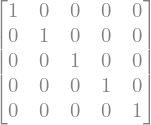

In [18]:
# Vérifions que P est bien une matrice orthogonale
P.transpose()@P

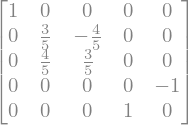

In [19]:
# Mise sous forme canonique
P.transpose()@M@P

## Exercice

Soit $E$ un espace euclidien, $u\in\mathcal{GL}(E)$, on a montré en cours (*décomposition polaire*) qu'il existait de manière unique $\rho\in\mathcal{S}^{++}(E)$ et $\omega\in \mathcal{O}(E)$, tels que $u=\rho\circ \omega$.
1. Montrer qu'il existe de manière unique $\rho'\in\mathcal{S}^{++}(E)$ et $\omega'\in\mathcal{O}(E)$ tels que
$$u=\omega'\circ\rho'$$
1. Donner un exemple où $(\rho,\omega)\ne\left(\rho',\omega'\right)$.
1. Donner une condition nécessaire et suffisante sur $u$ pour que $(\rho,\omega)=\left(\rho',\omega'\right)$.

**Question 1**

C'est la même démonstration, on procède par analyse/synthèse.
- *(Analyse)* Si $\rho'$ et $\omega'$ existent, alors
$$u=\omega'\circ\rho'\quad\text{et}\quad u^\star={\rho'}^\star\circ {\omega'}^\star=\rho'\circ {\omega'}^{-1}$$
et donc
$$u^\star\circ u= {\rho'}^2$$
Comme $\rho'$ est défini, positif, on sait qu'il y a une unique solution (la racine carrée de $u^\star\circ u$ qui est aussi défini, positif, puisque $u$ est bijectif). Finalement
$$\omega'=u\circ{\rho'}^{-1}$$
Ce qui nous montre l'unicité.
- *(Synthèse)* Soit ${\rho'}$ l'unique racine carrée de $u^\star\circ u\in\mathcal{S}^{++}(E)$ (*le vérifier*), alors posons $\omega'=u\circ{\rho'}^{-1}$, il suffit de vérifier que $\omega'\in\mathcal{O}(E)$. 
$${\omega'}^\star\circ\omega'={\rho'}^{-1}\circ u^\star\circ u\circ {\rho'}^{-1}={\rho'}^{-1}\circ{\rho'}^2\circ {\rho'}^{-1}=\mathrm{id}_{_E}$$

**Question 2**

Prenons n'importe quoi.

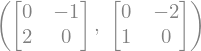

In [20]:
R = sp.Matrix([[1, 0], [0, 2]])
Omega = sp.Matrix([[0, -1], [1, 0]])
R@Omega, Omega@R


**Question 3**

Clairement, une condition nécessaire est que $u$ et $u^\star$ commutent, en effet si
$$u=\rho\circ \omega=\omega\circ \rho\quad\text{alors}\quad u^\star\circ u=\rho^2=u\circ u^\star$$
(*On dit que $u$ est un endomorphisme* normal).

Si $u\circ u^\star=u^\star\circ u$, alors $\boxed{\rho=\rho'}$ car $\rho$ est l'unique racine carrée symétrique, définie, positive de $u\circ u^\star$ et $\rho'$ est l'unique racine carrée symétrique, définie, positive de $u^\star\circ u$.

On a donc maintenant
$$\omega = \rho^{-1}\circ u\quad\text{et}\quad \omega'=u\circ \rho^{-1}$$
alors on obtient seulement
$$\omega'=\rho\circ\omega\circ\rho^{-1}$$
**La condition ne semble pas suffisante.**
Nous manquons de connaissances pour finir cet exercice...